In [1]:
import pandas as pd

## Data Processing

In [2]:
# Load the dataset
df = pd.read_csv('merged_cleaned.csv')  # Replace 'your_file.csv' with the path to your actual dataset

# Convert the 'Datetime' column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')

# Set the 'Datetime' column as the index
df.set_index('Datetime', inplace=True)

# Remove commas from all columns and convert to float
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '')  # Remove commas
    df[col] = df[col].astype(float)  # Convert to float

In [3]:
df

,Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,Total Energy,CO2_Indoor [ppm],Temperature_Indoor [°C],Pressure_Indoor [mbar],Relative Humidity_Indoor [%RH],Dewpoint Temperature_Indoor [°C td],Air Density_Indoor [g/m³],CO2_Outdoor [ppm],Temperature_Outdoor [°C],Pressure_Outdoor [mbar],Relative Humidity_Outdoor [%RH],Dewpoint Temperature_Outdoor [°C td],Air Density_Outdoor [g/m³]
Datetime,,,,,,,,,,,,,,,,,
2023-02-13 12:00:00,0.0000,0.0005,0.2035,0.0000,0.2040,538.0,26.1,1007.0,37.8,10.6,9.2,389.940639,21.831818,1008.0,45.813636,9.068636,8.617727
2023-02-13 12:15:00,0.0000,0.0042,0.0643,0.0000,0.0685,559.0,25.6,1007.0,38.6,10.5,9.2,390.054546,21.819005,1008.0,45.911765,9.085973,8.628507
2023-02-13 12:30:00,0.0000,0.0000,0.0507,0.0912,0.1419,548.0,25.8,1006.0,37.6,10.3,9.1,390.149321,21.806757,1008.0,46.011261,9.104054,8.640090
2023-02-13 12:45:00,0.0000,0.0000,0.0509,0.0914,0.1423,529.0,26.0,1006.0,36.8,10.1,8.9,390.247748,21.795964,1008.0,46.112556,9.123767,8.652915
2023-02-13 13:00:00,0.0000,0.0000,0.0513,0.0933,0.1446,529.0,26.0,1006.0,36.3,9.9,8.8,390.349776,21.786161,1008.0,46.227232,9.147321,8.668304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 23:00:00,0.0207,0.0000,0.0000,0.0000,0.0207,338.0,20.9,1010.0,70.6,15.4,12.9,250.000000,18.200000,1010.0,82.000000,15.100000,12.800000
2024-01-01 23:15:00,0.0205,0.0000,0.0000,0.0000,0.0205,346.0,20.9,1010.0,70.6,15.4,12.9,255.000000,18.100000,1010.0,82.300000,15.000000,12.700000
2024-01-01 23:30:00,0.0206,0.0000,0.0000,0.0000,0.0206,346.0,20.9,1010.0,70.6,15.4,12.9,256.000000,18.100000,1010.0,82.600000,15.100000,12.800000


In [4]:
def classify_missing_times(freq='15T'):
    """
    Classify missing time periods into single missing entries and continuous ranges.
    
    Parameters:
    missing_times (list): A list of missing timestamps.
    freq (str): The frequency of the data (default is '15T' for 15-minute intervals).
    
    Returns:
    tuple: Two lists - one for single missing entries and one for continuous time ranges (start and end).
    """
    single_entries = []
    time_ranges = []

    # Initialize start time
    start_time = None
    
    # Generate a complete date range based on the minimum and maximum date in the dataset
    full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='15T')
    # Find the missing time periods
    missing_times = full_range.difference(df.index.dropna()).to_list()

    # Iterate through the missing times
    for i in range(len(missing_times)):
        # Check if this is the start of a range
        if start_time is None:
            start_time = missing_times[i]

        # If not at the end of the list and the next time is continuous, continue the range
        if i < len(missing_times) - 1 and missing_times[i + 1] == missing_times[i] + pd.Timedelta(freq):
            continue
        else:
            # If the range contains only one entry, it's a single missing time
            if start_time == missing_times[i]:
                single_entries.append(start_time)
            else:
                # Add the range (start and end) to time_ranges
                time_ranges.append((start_time, missing_times[i]))

            # Reset the start time for the next potential range
            start_time = None
    
    return single_entries, time_ranges

# Example usage (using your earlier logic):
# missing_times = full_range.difference(df.index.dropna()).to_list()
# single_entries, time_ranges = classify_missing_times(missing_times)

In [5]:
single_entries, time_ranges = classify_missing_times()

In [6]:
single_entries

[Timestamp('2023-09-05 12:30:00'),
 Timestamp('2023-09-05 16:00:00'),
 Timestamp('2023-09-06 18:45:00'),
 Timestamp('2023-09-07 16:30:00'),
 Timestamp('2023-09-08 16:00:00'),
 Timestamp('2023-09-08 16:45:00'),
 Timestamp('2023-09-08 17:15:00'),
 Timestamp('2023-09-09 17:45:00'),
 Timestamp('2023-09-09 18:15:00'),
 Timestamp('2023-09-10 15:15:00'),
 Timestamp('2023-09-10 18:00:00'),
 Timestamp('2023-09-11 10:15:00'),
 Timestamp('2023-09-11 12:00:00'),
 Timestamp('2023-09-11 18:00:00')]

In [7]:
# Fill single missing time entries by interpolation
for single_time in single_entries:
    # Check if the previous and next rows exist (for interpolation)
    if (single_time - pd.Timedelta(minutes=15)) in df.index and (single_time + pd.Timedelta(minutes=15)) in df.index:
        df.loc[single_time] = pd.Series([None], dtype='float64')  # Assign NaN to the missing entry for interpolation

# Interpolate the missing single entries
df.interpolate(method='linear', inplace=True)

df = df.sort_values(by='Datetime')

In [8]:
df

,Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,Total Energy,CO2_Indoor [ppm],Temperature_Indoor [°C],Pressure_Indoor [mbar],Relative Humidity_Indoor [%RH],Dewpoint Temperature_Indoor [°C td],Air Density_Indoor [g/m³],CO2_Outdoor [ppm],Temperature_Outdoor [°C],Pressure_Outdoor [mbar],Relative Humidity_Outdoor [%RH],Dewpoint Temperature_Outdoor [°C td],Air Density_Outdoor [g/m³]
Datetime,,,,,,,,,,,,,,,,,
2023-02-13 12:00:00,0.0000,0.0005,0.2035,0.0000,0.2040,538.0,26.1,1007.0,37.8,10.6,9.2,389.940639,21.831818,1008.0,45.813636,9.068636,8.617727
2023-02-13 12:15:00,0.0000,0.0042,0.0643,0.0000,0.0685,559.0,25.6,1007.0,38.6,10.5,9.2,390.054546,21.819005,1008.0,45.911765,9.085973,8.628507
2023-02-13 12:30:00,0.0000,0.0000,0.0507,0.0912,0.1419,548.0,25.8,1006.0,37.6,10.3,9.1,390.149321,21.806757,1008.0,46.011261,9.104054,8.640090
2023-02-13 12:45:00,0.0000,0.0000,0.0509,0.0914,0.1423,529.0,26.0,1006.0,36.8,10.1,8.9,390.247748,21.795964,1008.0,46.112556,9.123767,8.652915
2023-02-13 13:00:00,0.0000,0.0000,0.0513,0.0933,0.1446,529.0,26.0,1006.0,36.3,9.9,8.8,390.349776,21.786161,1008.0,46.227232,9.147321,8.668304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 23:00:00,0.0207,0.0000,0.0000,0.0000,0.0207,338.0,20.9,1010.0,70.6,15.4,12.9,250.000000,18.200000,1010.0,82.000000,15.100000,12.800000
2024-01-01 23:15:00,0.0205,0.0000,0.0000,0.0000,0.0205,346.0,20.9,1010.0,70.6,15.4,12.9,255.000000,18.100000,1010.0,82.300000,15.000000,12.700000
2024-01-01 23:30:00,0.0206,0.0000,0.0000,0.0000,0.0206,346.0,20.9,1010.0,70.6,15.4,12.9,256.000000,18.100000,1010.0,82.600000,15.100000,12.800000


In [9]:
single_entries, time_ranges = classify_missing_times()

In [10]:
single_entries


[]

In [11]:
# Print time_ranges with the number of elements in each range
print("Continuous Time Ranges and Count of Missing Entries:")
for start, end in time_ranges:
    count = (end - start) // pd.Timedelta('15T') + 1  # Count number of missing timestamps
    print(f"From {start} to {end}: {count} missing entries")

Continuous Time Ranges and Count of Missing Entries:
From 2023-02-13 19:30:00 to 2023-02-13 23:45:00: 18 missing entries
From 2023-03-17 03:00:00 to 2023-03-17 04:30:00: 7 missing entries
From 2023-06-09 21:00:00 to 2023-06-09 21:45:00: 4 missing entries
From 2023-09-05 15:00:00 to 2023-09-05 15:15:00: 2 missing entries
From 2023-09-05 17:30:00 to 2023-09-06 09:45:00: 66 missing entries
From 2023-09-06 12:15:00 to 2023-09-06 13:00:00: 4 missing entries
From 2023-09-06 13:30:00 to 2023-09-06 13:45:00: 2 missing entries
From 2023-09-06 15:15:00 to 2023-09-06 15:30:00: 2 missing entries
From 2023-09-06 18:00:00 to 2023-09-06 18:15:00: 2 missing entries
From 2023-09-06 19:15:00 to 2023-09-07 11:00:00: 64 missing entries
From 2023-09-07 11:30:00 to 2023-09-07 11:45:00: 2 missing entries
From 2023-09-07 12:15:00 to 2023-09-07 12:45:00: 3 missing entries
From 2023-09-07 13:15:00 to 2023-09-07 15:45:00: 11 missing entries
From 2023-09-07 17:00:00 to 2023-09-07 17:15:00: 2 missing entries
From 

## EDA

In [12]:
print("Data Shape:", df.shape)

Data Shape: (30452, 17)


In [13]:
df.head()

,Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,Total Energy,CO2_Indoor [ppm],Temperature_Indoor [°C],Pressure_Indoor [mbar],Relative Humidity_Indoor [%RH],Dewpoint Temperature_Indoor [°C td],Air Density_Indoor [g/m³],CO2_Outdoor [ppm],Temperature_Outdoor [°C],Pressure_Outdoor [mbar],Relative Humidity_Outdoor [%RH],Dewpoint Temperature_Outdoor [°C td],Air Density_Outdoor [g/m³]
Datetime,,,,,,,,,,,,,,,,,
2023-02-13 12:00:00,0.0,0.0005,0.2035,0.0000,0.2040,538.0,26.1,1007.0,37.8,10.6,9.2,389.940639,21.831818,1008.0,45.813636,9.068636,8.617727
2023-02-13 12:15:00,0.0,0.0042,0.0643,0.0000,0.0685,559.0,25.6,1007.0,38.6,10.5,9.2,390.054546,21.819005,1008.0,45.911765,9.085973,8.628507
2023-02-13 12:30:00,0.0,0.0000,0.0507,0.0912,0.1419,548.0,25.8,1006.0,37.6,10.3,9.1,390.149321,21.806757,1008.0,46.011261,9.104054,8.640090
2023-02-13 12:45:00,0.0,0.0000,0.0509,0.0914,0.1423,529.0,26.0,1006.0,36.8,10.1,8.9,390.247748,21.795964,1008.0,46.112556,9.123767,8.652915
2023-02-13 13:00:00,0.0,0.0000,0.0513,0.0933,0.1446,529.0,26.0,1006.0,36.3,9.9,8.8,390.349776,21.786161,1008.0,46.227232,9.147321,8.668304


In [14]:
print(df.dtypes)

Computer - kWatts                       float64
Plug Load (kWatts)                      float64
Air Conditioner-kWatts                  float64
light + fan - kWatts                    float64
Total Energy                            float64
CO2_Indoor [ppm]                        float64
Temperature_Indoor [°C]                 float64
Pressure_Indoor [mbar]                  float64
Relative Humidity_Indoor [%RH]          float64
Dewpoint Temperature_Indoor [°C td]     float64
Air Density_Indoor [g/m³]               float64
CO2_Outdoor [ppm]                       float64
Temperature_Outdoor [°C]                float64
Pressure_Outdoor [mbar]                 float64
Relative Humidity_Outdoor [%RH]         float64
Dewpoint Temperature_Outdoor [°C td]    float64
Air Density_Outdoor [g/m³]              float64
dtype: object


In [15]:
print(df.isnull().sum())

Computer - kWatts                       0
Plug Load (kWatts)                      0
Air Conditioner-kWatts                  0
light + fan - kWatts                    0
Total Energy                            0
CO2_Indoor [ppm]                        0
Temperature_Indoor [°C]                 0
Pressure_Indoor [mbar]                  0
Relative Humidity_Indoor [%RH]          0
Dewpoint Temperature_Indoor [°C td]     0
Air Density_Indoor [g/m³]               0
CO2_Outdoor [ppm]                       0
Temperature_Outdoor [°C]                0
Pressure_Outdoor [mbar]                 0
Relative Humidity_Outdoor [%RH]         0
Dewpoint Temperature_Outdoor [°C td]    0
Air Density_Outdoor [g/m³]              0
dtype: int64


In [16]:
df.describe()

,Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,Total Energy,CO2_Indoor [ppm],Temperature_Indoor [°C],Pressure_Indoor [mbar],Relative Humidity_Indoor [%RH],Dewpoint Temperature_Indoor [°C td],Air Density_Indoor [g/m³],CO2_Outdoor [ppm],Temperature_Outdoor [°C],Pressure_Outdoor [mbar],Relative Humidity_Outdoor [%RH],Dewpoint Temperature_Outdoor [°C td],Air Density_Outdoor [g/m³]
count,30452.000000,30452.000000,30452.000000,30452.000000,30452.000000,30452.000000,30452.000000,30452.000000,30452.000000,30452.000000,30452.000000,30452.000000,30452.000000,30452.000000,30452.000000,30452.000000,30452.000000
mean,0.008363,0.000469,0.031023,0.006355,0.046209,424.541935,28.811644,1001.116117,64.367334,21.210268,18.450990,409.200388,27.894285,1001.260377,73.597672,22.311158,19.936562
std,0.013355,0.003626,0.148387,0.021023,0.160164,133.929758,3.548598,5.823551,9.702359,3.732552,3.788662,47.728360,4.285916,5.765423,14.755344,4.380997,4.642809
min,0.000000,0.000000,0.000000,0.000000,0.000000,301.000000,18.200000,984.000000,31.800000,8.700000,8.200000,220.000000,14.400000,984.000000,17.800000,4.000000,6.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,352.000000,27.100000,996.000000,58.200000,18.900000,15.700000,398.000000,25.700000,996.000000,66.300000,19.600000,16.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000400,379.000000,29.400000,1001.000000,67.000000,21.900000,18.800000,416.000000,28.100000,1001.000000,77.700000,23.500000,20.800000
75%,0.016900,0.000000,0.000100,0.000000,0.023300,436.000000,31.100000,1006.000000,71.400000,24.300000,21.700000,431.000000,30.500000,1007.000000,84.500000,25.900000,24.000000
max,0.153600,0.156800,1.018000,0.105100,1.111000,1895.000000,35.900000,1015.000000,85.700000,27.700000,26.400000,573.000000,41.300000,1015.000000,94.200000,29.000000,28.400000


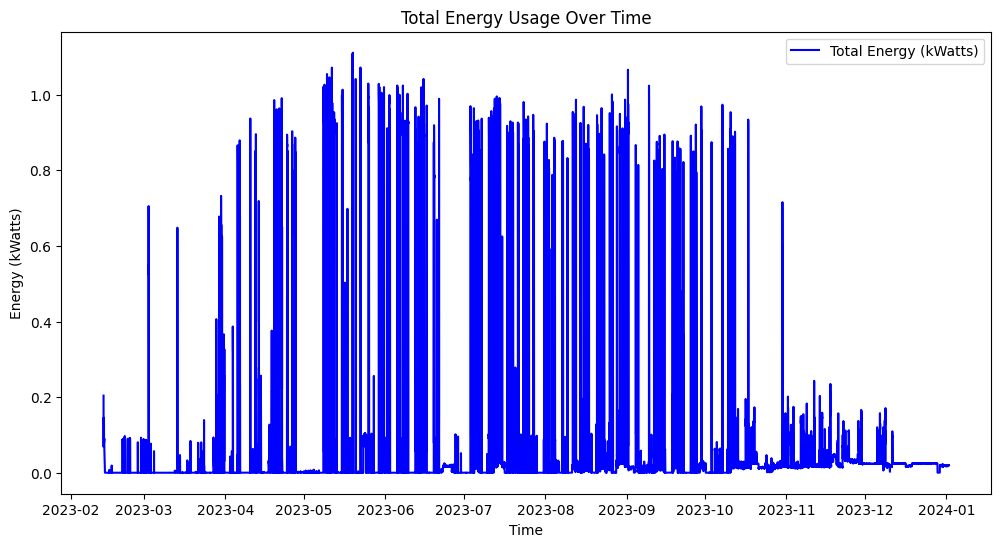

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Energy'], label='Total Energy (kWatts)', color='blue')
plt.title('Total Energy Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Energy (kWatts)')
plt.legend()
plt.show()

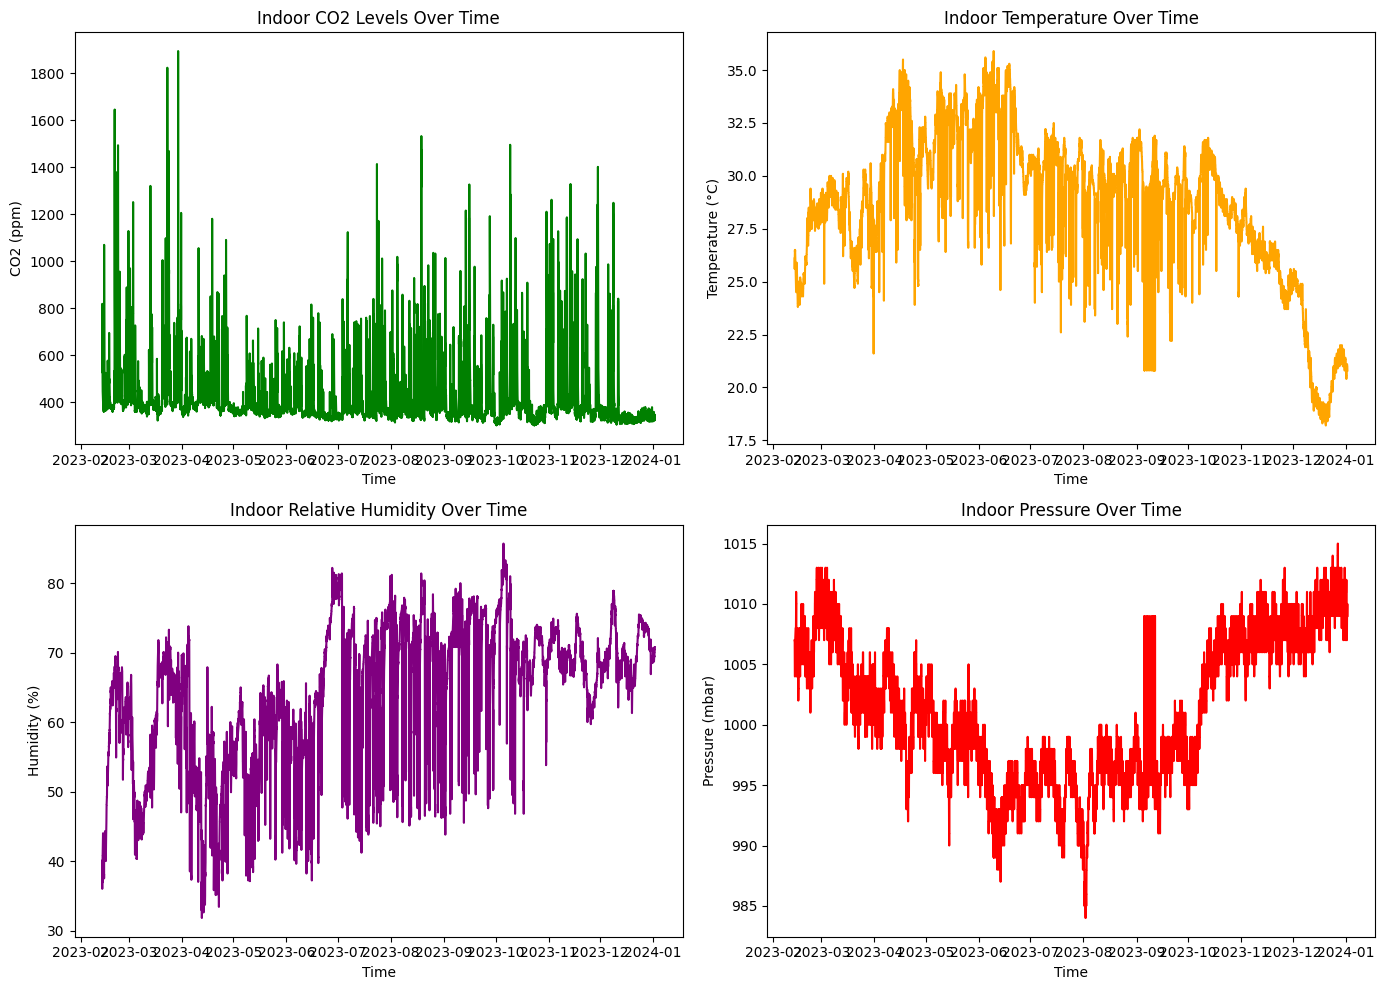

In [18]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.plot(df.index, df['CO2_Indoor [ppm]'], label='CO2 Indoor', color='green')
plt.title('Indoor CO2 Levels Over Time')
plt.xlabel('Time')
plt.ylabel('CO2 (ppm)')

plt.subplot(2, 2, 2)
plt.plot(df.index, df['Temperature_Indoor [°C]'], label='Temperature Indoor', color='orange')
plt.title('Indoor Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

plt.subplot(2, 2, 3)
plt.plot(df.index, df['Relative Humidity_Indoor [%RH]'], label='Relative Humidity Indoor', color='purple')
plt.title('Indoor Relative Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')

plt.subplot(2, 2, 4)
plt.plot(df.index, df['Pressure_Indoor [mbar]'], label='Pressure Indoor', color='red')
plt.title('Indoor Pressure Over Time')
plt.xlabel('Time')
plt.ylabel('Pressure (mbar)')

plt.tight_layout()
plt.show()

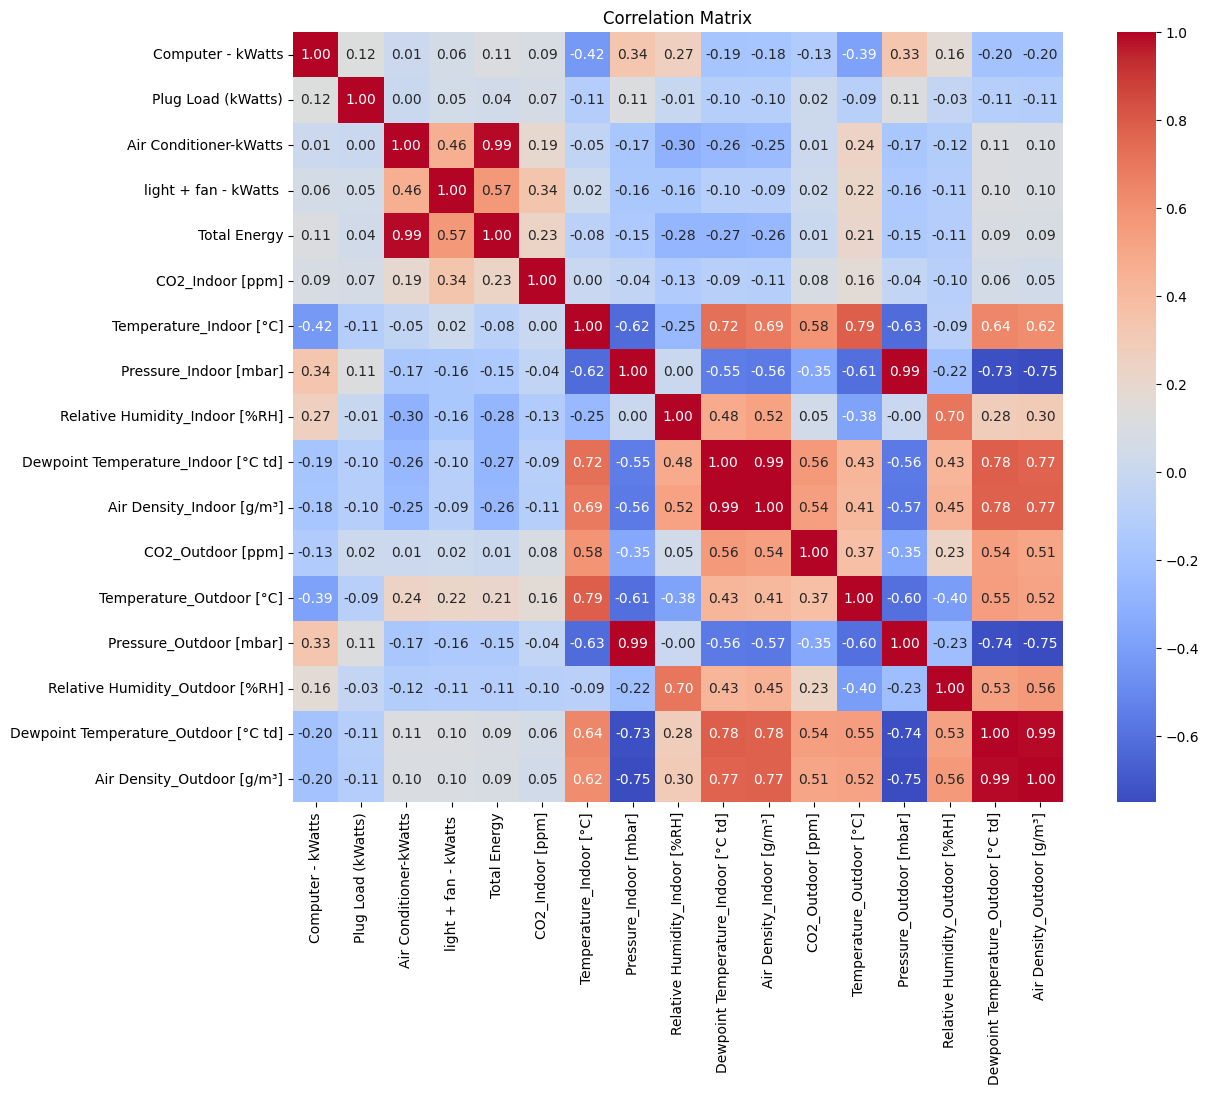

In [19]:
# Correlation Analysis
import seaborn as sns

plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

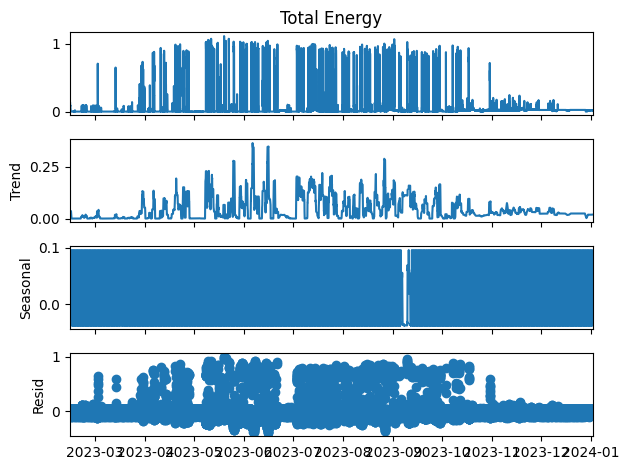

In [20]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Total Energy'], model='additive', period=96)  # Assuming 15-min intervals, hence period=96 for daily seasonality
result.plot()
plt.show()


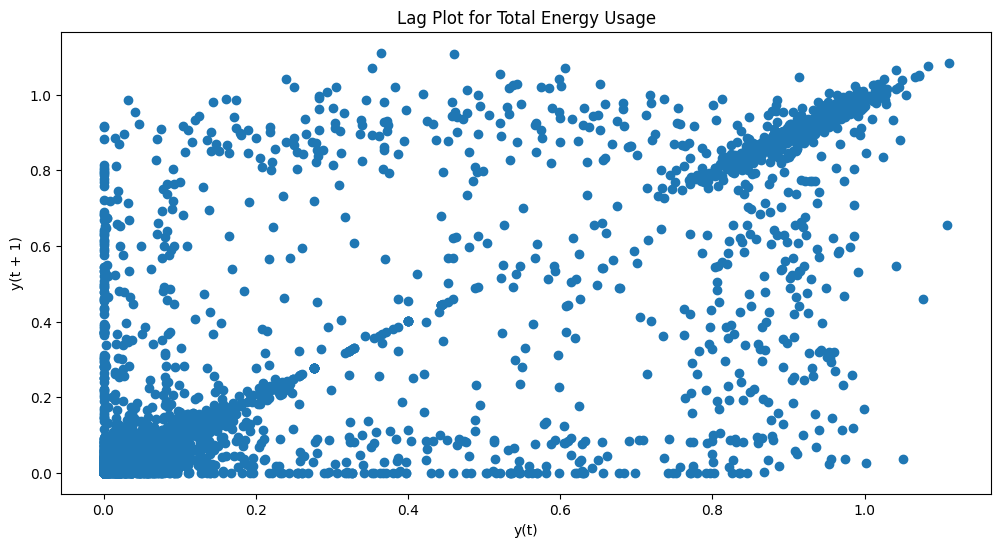

In [21]:
# Lag Plots
plt.figure(figsize=(12, 6))
pd.plotting.lag_plot(df['Total Energy'])
plt.title('Lag Plot for Total Energy Usage')
plt.show()

## Normalization

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select only the numerical columns for scaling
features_to_scale = df.columns.tolist()  # List of all feature names

# Fit and transform the data using Z-score normalization
df_normalized = df.copy()
df_normalized[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the normalized DataFrame
df_normalized.head()


,Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,Total Energy,CO2_Indoor [ppm],Temperature_Indoor [°C],Pressure_Indoor [mbar],Relative Humidity_Indoor [%RH],Dewpoint Temperature_Indoor [°C td],Air Density_Indoor [g/m³],CO2_Outdoor [ppm],Temperature_Outdoor [°C],Pressure_Outdoor [mbar],Relative Humidity_Outdoor [%RH],Dewpoint Temperature_Outdoor [°C td],Air Density_Outdoor [g/m³]
Datetime,,,,,,,,,,,,,,,,,
2023-02-13 12:00:00,-0.626213,0.008673,1.162370,-0.302290,0.985200,0.847160,-0.764158,1.010377,-2.738279,-2.842678,-2.441797,-0.403535,-1.414532,1.168992,-1.883012,-3.022768,-2.437968
2023-02-13 12:15:00,-0.626213,1.029043,0.224264,-0.302290,0.139179,1.003961,-0.905061,1.010377,-2.655824,-2.869469,-2.441797,-0.401148,-1.417522,1.168992,-1.876362,-3.018811,-2.435646
2023-02-13 12:30:00,-0.626213,-0.129215,0.132610,4.035950,0.597467,0.921827,-0.848699,0.838657,-2.758893,-2.923053,-2.468192,-0.399163,-1.420380,1.168992,-1.869618,-3.014684,-2.433151
2023-02-13 12:45:00,-0.626213,-0.129215,0.133958,4.045464,0.599964,0.779959,-0.792338,0.838657,-2.841349,-2.976636,-2.520982,-0.397100,-1.422898,1.168992,-1.862753,-3.010184,-2.430389
2023-02-13 13:00:00,-0.626213,-0.129215,0.136653,4.135844,0.614325,0.779959,-0.792338,0.838657,-2.892884,-3.030220,-2.547376,-0.394963,-1.425185,1.168992,-1.854981,-3.004807,-2.427074


In [23]:
df_normalized.describe()

,Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,Total Energy,CO2_Indoor [ppm],Temperature_Indoor [°C],Pressure_Indoor [mbar],Relative Humidity_Indoor [%RH],Dewpoint Temperature_Indoor [°C td],Air Density_Indoor [g/m³],CO2_Outdoor [ppm],Temperature_Outdoor [°C],Pressure_Outdoor [mbar],Relative Humidity_Outdoor [%RH],Dewpoint Temperature_Outdoor [°C td],Air Density_Outdoor [g/m³]
count,3.045200e+04,30452.000000,3.045200e+04,3.045200e+04,3.045200e+04,3.045200e+04,3.045200e+04,3.045200e+04,3.045200e+04,3.045200e+04,3.045200e+04,3.045200e+04,3.045200e+04,3.045200e+04,3.045200e+04,3.045200e+04,3.045200e+04
mean,-2.986650e-17,0.000000,-7.466625e-18,6.346632e-17,-5.226638e-17,-1.269326e-16,-1.075194e-15,-3.106116e-15,-1.194660e-16,7.167960e-16,-3.285315e-16,-8.959950e-16,-5.674635e-16,-7.526358e-15,3.079983e-16,-2.986650e-17,-2.090655e-16
std,1.000016e+00,1.000016,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-6.262128e-01,-0.129215,-2.090711e-01,-3.022902e-01,-2.885142e-01,-9.224534e-01,-2.990425e+00,-2.939169e+00,-3.356696e+00,-3.351721e+00,-2.705746e+00,-3.964173e+00,-3.148570e+00,-2.993824e+00,-3.781585e+00,-4.179747e+00,-3.001801e+00
25%,-6.262128e-01,-0.129215,-2.090711e-01,-3.022902e-01,-2.885142e-01,-5.416505e-01,-4.823515e-01,-8.785364e-01,-6.356635e-01,-6.189614e-01,-7.261231e-01,-2.346733e-01,-5.119842e-01,-9.124158e-01,-4.945864e-01,-6.188550e-01,-7.402024e-01
50%,-6.262128e-01,-0.129215,-2.090711e-01,-3.022902e-01,-2.860167e-01,-3.400490e-01,1.658024e-01,-1.993957e-02,2.713473e-01,1.847914e-01,9.212121e-02,1.424672e-01,4.799866e-02,-4.516256e-02,2.780277e-01,2.713679e-01,1.859762e-01
75%,6.392963e-01,-0.129215,-2.083972e-01,-3.022902e-01,-1.430360e-01,8.555420e-02,6.448727e-01,8.386572e-01,7.248527e-01,8.277937e-01,8.575755e-01,4.567509e-01,6.079815e-01,9.955413e-01,7.388853e-01,8.191974e-01,8.752254e-01
max,1.087569e+01,43.112426,6.651503e+00,4.697151e+00,6.648234e+00,1.097950e+01,1.997542e+00,2.384131e+00,2.198745e+00,1.738714e+00,2.098139e+00,3.431970e+00,3.127904e+00,2.383147e+00,1.396285e+00,1.526810e+00,1.822943e+00


## Energy Forecast

### Train-test split

In [24]:
# Create a new DataFrame for datetime features
time_series = pd.DataFrame(index=df.index)  # Initialize with the same index

# Extract datetime features
time_series['Hour'] = time_series.index.hour         # Extract the hour from the datetime index
time_series['Day'] = time_series.index.day           # Extract the day of the month
time_series['Month'] = time_series.index.month       # Extract the month
time_series['Weekday'] = time_series.index.weekday # Extract the day of the week (0=Monday, 6=Sunday)
time_series['Week of Year'] = time_series.index.isocalendar().week  # Extract the week of the year


# Add the Total Energy from the original df if needed
time_series['Total Energy'] = df['Total Energy']


# Display the new DataFrame
print(time_series.head()) 

                     Hour  Day  Month  Weekday  Week of Year  Total Energy
Datetime                                                                  
2023-02-13 12:00:00    12   13      2        0             7        0.2040
2023-02-13 12:15:00    12   13      2        0             7        0.0685
2023-02-13 12:30:00    12   13      2        0             7        0.1419
2023-02-13 12:45:00    12   13      2        0             7        0.1423
2023-02-13 13:00:00    13   13      2        0             7        0.1446


In [25]:
# 1. Split the data into training and test sets
train_size = int(len(df_normalized) * 0.80)
train, test = df_normalized['Total Energy'].values[:train_size], df_normalized['Total Energy'].values[train_size:]

# Denormalize the test data
mean_total_energy = df['Total Energy'].mean()
std_total_energy = df['Total Energy'].std()

# Denormalize the test data
test_denormalized = (test * std_total_energy) + mean_total_energy

### ARIMA

In [26]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Ignore warnings to keep the output clean
warnings.filterwarnings("ignore")

# Define a function to fit ARIMA models and return the AIC score
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    
    # Fit the ARIMA model
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    
    # Make predictions on test data
    predictions = model_fit.forecast(steps=len(test))
    
    # Calculate RMSE or other performance metrics
    error = mean_squared_error(test, predictions)
    
    return error, model_fit.aic

# Grid search for ARIMA hyperparameters
def grid_search_arima(X, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    best_aic = float("inf")
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse, aic = evaluate_arima_model(X, order)
                    if mse < best_score:
                        best_score, best_cfg, best_aic = mse, order, aic
                    print(f"ARIMA{order} MSE={mse:.3f}, AIC={aic:.3f}")
                except Exception as e:
                    continue
    print(f"Best ARIMA{best_cfg} MSE={best_score:.3f}, AIC={best_aic:.3f}")
    return best_cfg, best_aic


In [27]:
# Example usage with your Total Energy column (or any other relevant time-series)
X = df_normalized['Total Energy'].values

# Define the p, d, q values to try in grid search
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

# Perform grid search
best_order, best_aic = grid_search_arima(X, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.043, AIC=74382.005
ARIMA(0, 0, 1) MSE=0.043, AIC=52823.909
ARIMA(0, 0, 2) MSE=0.043, AIC=44109.920
ARIMA(0, 0, 3) MSE=0.044, AIC=40945.683
ARIMA(0, 1, 0) MSE=12.952, AIC=40683.013
ARIMA(0, 1, 1) MSE=13.075, AIC=39610.189
ARIMA(0, 1, 2) MSE=12.358, AIC=39173.577
ARIMA(0, 1, 3) MSE=10.873, AIC=38776.868
ARIMA(1, 0, 0) MSE=0.049, AIC=39116.742
ARIMA(1, 0, 1) MSE=0.047, AIC=37245.016
ARIMA(1, 0, 2) MSE=0.047, AIC=37234.735
ARIMA(1, 0, 3) MSE=0.048, AIC=37228.759
ARIMA(1, 1, 0) MSE=13.289, AIC=39952.951
ARIMA(1, 1, 1) MSE=12.949, AIC=39393.174
ARIMA(1, 1, 2) MSE=0.030, AIC=37213.089
ARIMA(1, 1, 3) MSE=0.030, AIC=37205.263
ARIMA(2, 0, 0) MSE=0.047, AIC=37540.613
ARIMA(2, 0, 1) MSE=0.047, AIC=37236.284
ARIMA(2, 0, 2) MSE=0.049, AIC=37194.311
ARIMA(2, 0, 3) MSE=0.049, AIC=37196.310
ARIMA(2, 1, 0) MSE=11.971, AIC=39028.484
ARIMA(2, 1, 1) MSE=0.029, AIC=37502.627
ARIMA(2, 1, 2) MSE=0.030, AIC=37206.373
ARIMA(2, 1, 3) MSE=0.030, AIC=37215.660
ARIMA(3, 0, 0) MSE=0.047, AIC=372

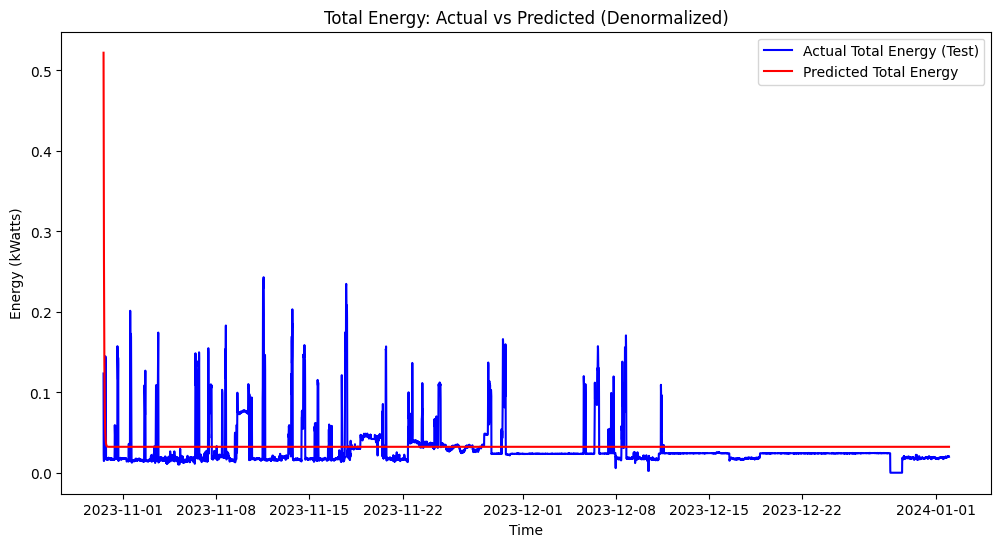

In [28]:
# 2. Fit ARIMA model using the best order found in the previous grid search
final_model_arima = ARIMA(train, order=best_order)
final_model_arima_fit = final_model_arima.fit()

# 3. Make predictions on the test set
predictions_arima = final_model_arima_fit.forecast(steps=len(test))

# 4. Denormalize the test and predictions
mean_total_energy = df['Total Energy'].mean()
std_total_energy = df['Total Energy'].std()

# Denormalize the predictions
predictions_denormalized_arima = (predictions_arima * std_total_energy) + mean_total_energy

# 5. Plot the denormalized test data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size:], test_denormalized, label='Actual Total Energy (Test)', color='blue')
plt.plot(df.index[train_size:], predictions_denormalized_arima, label='Predicted Total Energy', color='red')
plt.title('Total Energy: Actual vs Predicted (Denormalized)')
plt.xlabel('Time')
plt.ylabel('Energy (kWatts)')
plt.legend()
plt.show()

### SARIMA

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ignore warnings to keep the output clean
warnings.filterwarnings("ignore")

# Define a function to fit SARIMA models and return the AIC score
def evaluate_sarima_model(X, sarima_order, seasonal_order):
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    
    # Fit the SARIMA model
    model = SARIMAX(train, order=sarima_order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Make predictions on test data
    predictions = model_fit.forecast(steps=len(test))
    
    # Calculate RMSE
    error = mean_squared_error(test, predictions)
    
    return error, model_fit.aic

# Grid search for SARIMA hyperparameters
def grid_search_sarima(X, p_values, d_values, q_values, P_values, D_values, Q_values, S):
    best_score, best_cfg, best_seasonal_order = float("inf"), None, None
    best_aic = float("inf")
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            seasonal_order = (P, D, Q, S)
                            try:
                                mse, aic = evaluate_sarima_model(X, (p, d, q), seasonal_order)
                                if mse < best_score:
                                    best_score, best_cfg, best_seasonal_order, best_aic = mse, (p, d, q), seasonal_order, aic
                                print(f"SARIMA{(p, d, q)}x{seasonal_order} MSE={mse:.3f}, AIC={aic:.3f}")
                            except Exception as e:
                                continue
    print(f"Best SARIMA{best_cfg}x{best_seasonal_order} MSE={best_score:.3f}, AIC={best_aic:.3f}")
    return best_cfg, best_seasonal_order, best_aic

In [30]:
# Example usage with your Total Energy column (or any other relevant time-series)
X = df_normalized['Total Energy'].values

# Define the p, d, q values to try in grid search
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

# Define the seasonal P, D, Q values and seasonal period (S)
P_values = range(0, 3)
D_values = range(0, 2)
Q_values = range(0, 3)
S = 96  # Seasonal period (96 corresponds to daily seasonality for 15-minute intervals)

# Perform grid search
best_order, best_seasonal_order, best_aic = grid_search_sarima(X, p_values, d_values, q_values, P_values, D_values, Q_values, S)

SARIMA(0, 0, 0)x(0, 0, 0, 96) MSE=0.036, AIC=74393.766


KeyboardInterrupt: 

In [40]:
best_order, best_seasonal_order = (2, 2, 1), (2, 1, 2, 96)

# After finding the best (p, d, q) and seasonal order, fit the SARIMA model
final_model_sarima = SARIMAX(df_normalized['Total Energy'], order=best_order, seasonal_order=best_seasonal_order)
final_model_sarima_fit = final_model_sarima.fit()

# Print the summary of the final model
print(final_model_sarima_fit.summary())

KeyboardInterrupt: 

In [ ]:
# Make predictions on the test set
predictions_sarima = final_model_sarima_fit.forecast(steps=len(test))

# Denormalize the predictions (if data was normalized earlier)
predictions_denormalized_sarima = (predictions_sarima * std_total_energy) + mean_total_energy

# Plot the test data and predictions (denormalized)
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size:], test_denormalized, label='Actual Total Energy (Test)', color='blue')
plt.plot(df.index[train_size:], predictions_denormalized_sarima, label='Predicted Total Energy', color='red')
plt.title('Total Energy: Actual vs Predicted (Denormalized)')
plt.xlabel('Time')
plt.ylabel('Energy (kWatts)')
plt.legend()
plt.show()

### LSTM

In [32]:
# Create a new DataFrame for datetime features
time_series = pd.DataFrame(index=df.index)  # Initialize with the same index

# Extract datetime features
time_series['Hour'] = time_series.index.hour         # Extract the hour from the datetime index
time_series['Day'] = time_series.index.day           # Extract the day of the month
time_series['Month'] = time_series.index.month       # Extract the month
time_series['Weekday'] = time_series.index.weekday # Extract the day of the week (0=Monday, 6=Sunday)
time_series['Week of Year'] = time_series.index.isocalendar().week  # Extract the week of the year


# Add the Total Energy from the original df if needed
time_series['Total Energy'] = df['Total Energy']


# Display the new DataFrame
print(time_series.head()) 

                     Hour  Day  Month  Weekday  Week of Year  Total Energy
Datetime                                                                  
2023-02-13 12:00:00    12   13      2        0             7        0.2040
2023-02-13 12:15:00    12   13      2        0             7        0.0685
2023-02-13 12:30:00    12   13      2        0             7        0.1419
2023-02-13 12:45:00    12   13      2        0             7        0.1423
2023-02-13 13:00:00    13   13      2        0             7        0.1446


In [33]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Create a function to prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        a = data.iloc[i:(i + time_step), :].values  # Use iloc to select rows and convert to numpy array
        X.append(a)
        y.append(data.iloc[i + time_step, 5])  # Assuming index 5 is for 'Total Energy'
    return np.array(X), np.array(y)

# Prepare the dataset
time_step = 15  # Number of previous time steps to consider
X, y = create_dataset(time_series, time_step)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])  # Reshape for LSTM

# Convert X and y to float32
X = X.astype(np.float32)
y = y.astype(np.float32)

# Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for Total Energy

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
761/761 [==============================] - 11s 10ms/step - loss: 0.0265 - val_loss: 9.3964e-04
Epoch 2/100
761/761 [==============================] - 7s 9ms/step - loss: 0.0122 - val_loss: 8.9961e-04
Epoch 3/100
761/761 [==============================] - 7s 9ms/step - loss: 0.0091 - val_loss: 3.0273e-04
Epoch 4/100
761/761 [==============================] - 7s 9ms/step - loss: 0.0087 - val_loss: 2.0925e-04
Epoch 5/100
761/761 [==============================] - 7s 9ms/step - loss: 0.0085 - val_loss: 5.8915e-04
Epoch 6/100
761/761 [==============================] - 7s 10ms/step - loss: 0.0083 - val_loss: 7.3492e-04
Epoch 7/100
761/761 [==============================] - 7s 10ms/step - loss: 0.0082 - val_loss: 2.7268e-04
Epoch 8/100
761/761 [==============================] - 7s 10ms/step - loss: 0.0078 - val_loss: 6.0996e-04
Epoch 9/100
761/761 [==============================] - 7s 10ms/step - loss: 0.0077 - val_loss: 3.7597e-04
Epoch 10/100
761/761 [===========================

191/191 [==============================] - 1s 3ms/step


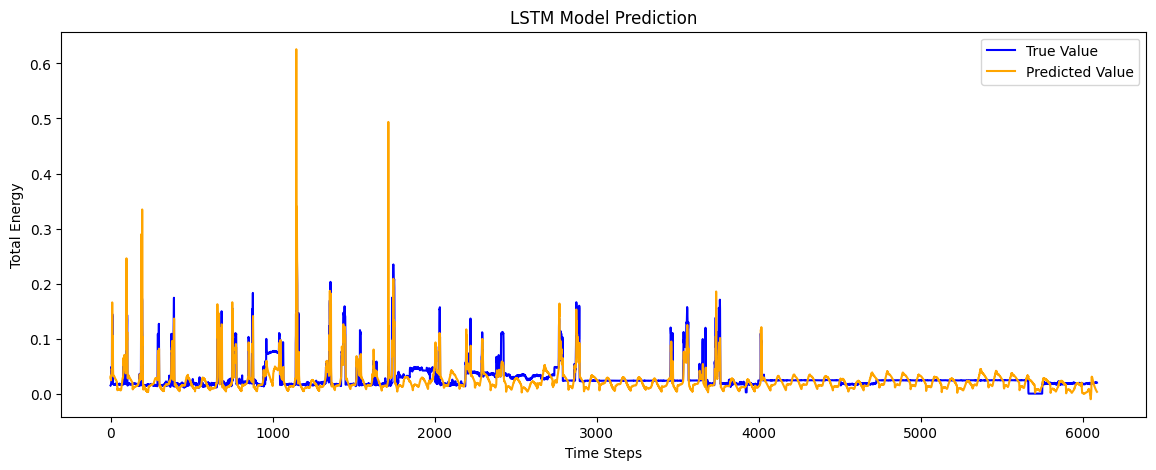

In [34]:
# Predicting
y_pred = model.predict(X_test)

# Inverse transform the predictions

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True Value', color='blue')
plt.plot(y_pred, label='Predicted Value', color='orange')
plt.title('LSTM Model Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Total Energy')
plt.legend()
plt.show()


### Prophet

In [35]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# Step 1: Prepare the data for Prophet
df_prophet = time_series.reset_index()[['Datetime', 'Total Energy']]
df_prophet.rename(columns={'Datetime': 'ds', 'Total Energy': 'y'}, inplace=True)

# Add extra regressors (e.g., CO2_Indoor, Temperature_Indoor) to help the model
df_prophet['CO2_Indoor [ppm]'] = df.reset_index()['CO2_Indoor [ppm]']
df_prophet['Temperature_Indoor [°C]'] = df.reset_index()['Temperature_Indoor [°C]']

In [36]:
# Step 2: Train-Test Split
# We'll use the last 10% of the data as the test set
train_size = int(len(df_prophet) * 0.9)
train_data = df_prophet.iloc[:train_size]
test_data = df_prophet.iloc[train_size:]

# Step 3: Initialize the Prophet model
model = Prophet(
    daily_seasonality=False,  # Disable daily seasonality
    weekly_seasonality=True,
    changepoint_prior_scale=0.05  # Adjust for trend shifts
)

# Add custom seasonalities
model.add_seasonality(name='quarterly', period=0.25, fourier_order=5)  # Adding 15-minute seasonality

# Add extra regressors for CO2_Indoor and Temperature_Indoor
model.add_regressor('CO2_Indoor [ppm]')
model.add_regressor('Temperature_Indoor [°C]')

# Step 4: Fit the model on training data
model.fit(train_data)

09:44:39 - cmdstanpy - INFO - Chain [1] start processing
09:44:50 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
# Step 5: Create future dataframe for forecasting (covering both train and test period)
future = model.make_future_dataframe(periods=len(test_data), freq='15T')

# Add the extra regressors for the test data using df_prophet
future['CO2_Indoor [ppm]'] = df_prophet['CO2_Indoor [ppm]'].values
future['Temperature_Indoor [°C]'] = df_prophet['Temperature_Indoor [°C]'].values

# Step 6: Make predictions
forecast = model.predict(future)

# Step 7: Extract the forecast for the test period
forecast_test = forecast[['ds', 'yhat']].iloc[train_size:]  # Only consider predictions for the test period
forecast_test = forecast_test.set_index('ds')
test_data = test_data.set_index('ds')

# Step 8: Calculate Accuracy Metrics
mae = mean_absolute_error(test_data['y'], forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(test_data['y'], forecast_test['yhat']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.10379855202684672
Root Mean Squared Error (RMSE): 0.12505294307267442


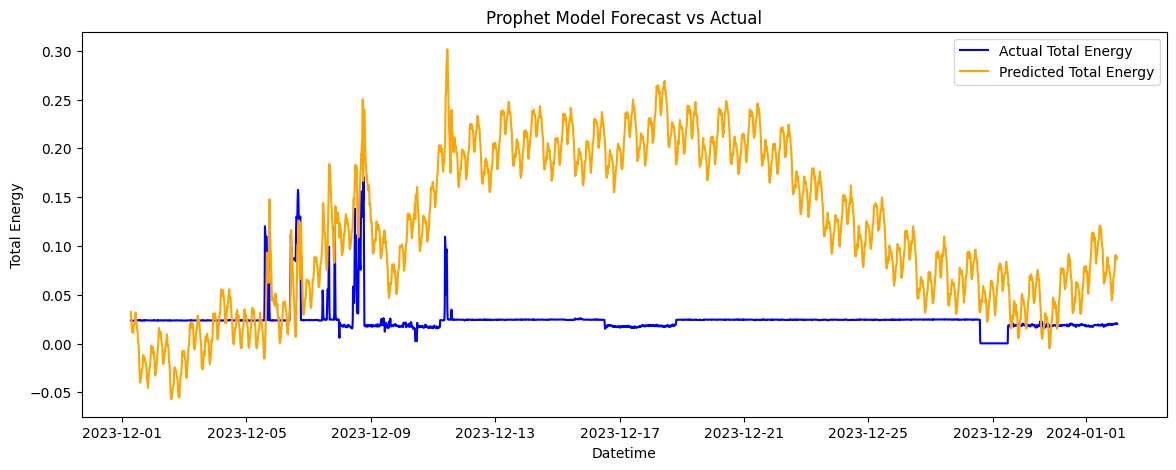

In [38]:
# Step 9: Plot the results
plt.figure(figsize=(14, 5))
plt.plot(test_data['y'], label='Actual Total Energy', color='blue')
plt.plot(forecast_test['yhat'], label='Predicted Total Energy', color='orange')
plt.title('Prophet Model Forecast vs Actual')
plt.xlabel('Datetime')
plt.ylabel('Total Energy')
plt.legend()
plt.show()

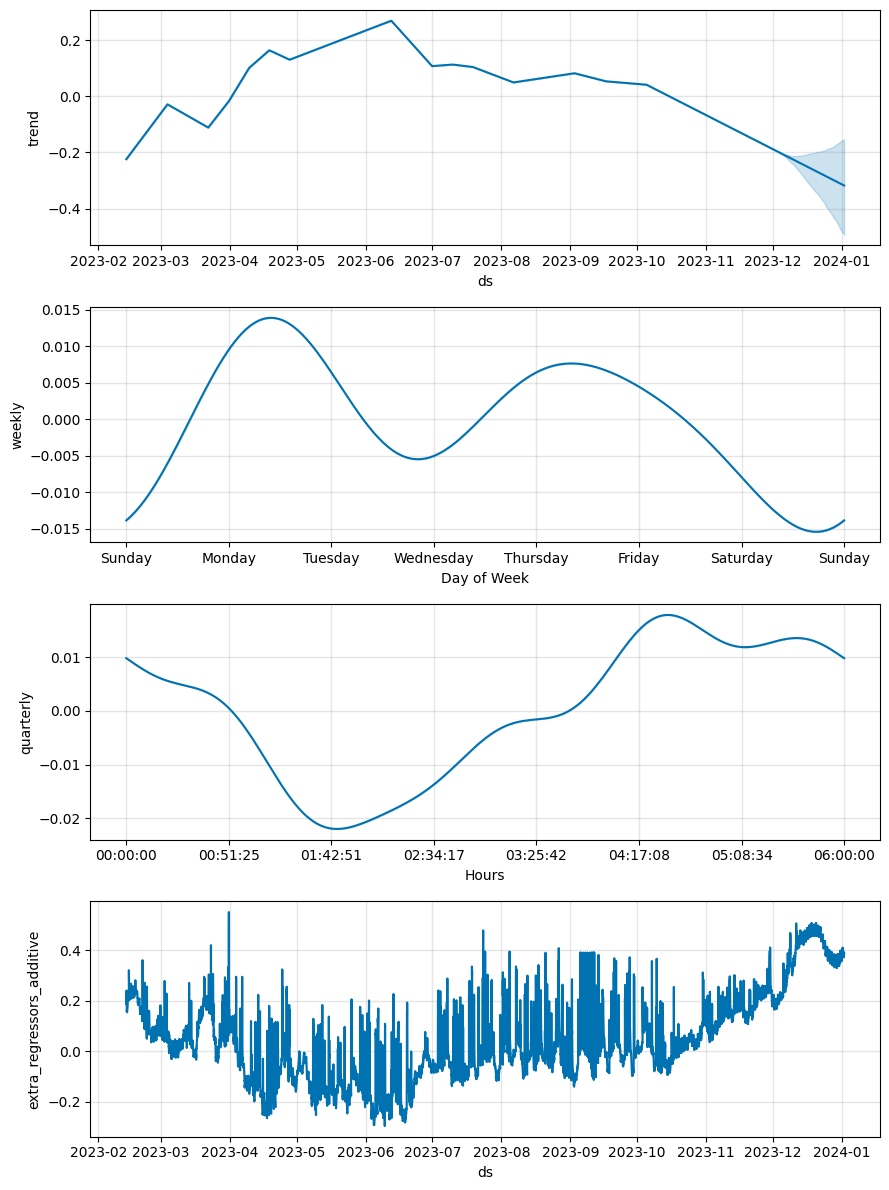

In [39]:
# Step 10: Optional - Plot the full forecast with trends and seasonality
model.plot_components(forecast)
plt.show()

## Occupancy Prediction

In [45]:
# Define a function to create an 'Occupancy' column
def create_occupancy_labels(df):
    # Define thresholds for various features
    energy_usage_threshold = 0.05  # Total Energy usage threshold
    co2_threshold = 450  # CO2 level threshold
    temperature_threshold = 25  # Temperature threshold
    computer_usage_threshold = 0  # Computer usage threshold
    plug_load_threshold = 0  # Plug load usage threshold
    air_conditioner_threshold = 0  # Air conditioner usage threshold
    light_fan_threshold = 0  # Light + fan usage threshold
    
    # Create conditions based on the thresholds
    conditions = [
        (df['Total Energy'] > energy_usage_threshold) |  # Total energy condition
        (df['CO2_Indoor [ppm]'] > co2_threshold) |  # CO2 condition
        (df['Temperature_Indoor [°C]'] > temperature_threshold) |  # Temperature condition
        (df['Computer - kWatts'] > computer_usage_threshold) |  # Computer usage condition
        (df['Plug Load (kWatts)'] > plug_load_threshold) |  # Plug load condition
        (df['Air Conditioner-kWatts'] > air_conditioner_threshold)   # Air conditioner usage condition
        # (df['light + fan - kWatts'] > light_fan_threshold)  # Light + fan condition
    ]
    
    # Create a new column 'Occupancy' based on the conditions
    df['Occupancy'] = np.where(conditions[0], 1, 0)
    return df

In [46]:
# Apply the function to your dataset
df = create_occupancy_labels(df)

In [47]:
from sklearn.model_selection import train_test_split

# Select relevant features and the new 'Occupancy' label
features = ['Total Energy', 'CO2_Indoor [ppm]', 'Temperature_Indoor [°C]', 'Relative Humidity_Indoor [%RH]']

# features = [
#     "Computer - kWatts", 
#     "Plug Load (kWatts)", 
#     "Air Conditioner-kWatts",
#     "light + fan - kWatts", 
#     "Total Energy", 
#     "CO2_Indoor [ppm]", 
#     "Temperature_Indoor [°C]", 
#     "Pressure_Indoor [mbar]", 
#     "Relative Humidity_Indoor [%RH]", 
#     "Dewpoint Temperature_Indoor [°C td]",
#     "Air Density_Indoor [g/m³]", 
#     "CO2_Outdoor [ppm]", 
#     "Temperature_Outdoor [°C]", 
#     "Pressure_Outdoor [mbar]", 
#     "Relative Humidity_Outdoor [%RH]", 
#     "Dewpoint Temperature_Outdoor [°C td]", 
#     "Air Density_Outdoor [g/m³]"
# ]

X = df[features]
y = df['Occupancy']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
dt_pred = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)
print("Decision Tree Classifier:")
print("Accuracy:", dt_accuracy)
print("Classification Report:")
print(dt_report)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
rf_pred = rf_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)
print("\nRandom Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Classification Report:")
print(rf_report)

# KNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_pred = knn_classifier.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
print("\nKNN Classifier:")
print("Accuracy:", knn_accuracy)
print("Classification Report:")
print(knn_report)

# SVM Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)
svm_pred = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
print("\nSupport Vector Machines (SVM) Classifier:")
print("Accuracy:", svm_accuracy)
print("Classification Report:")
print(svm_report)

# # Gaussian Process Classifier
# gaussian_classifier = GaussianProcessClassifier(kernel=RBF())
# gaussian_classifier.fit(X_train_scaled, y_train)
# gaussian_pred = gaussian_classifier.predict(X_test_scaled)
# gaussian_accuracy = accuracy_score(y_test, gaussian_pred)
# gaussian_report = classification_report(y_test, gaussian_pred)
# print("\nGaussian Process Classifier:")
# print("Accuracy:", gaussian_accuracy)
# print("Classification Report:")
# print(gaussian_report)

# Polynomial Regression (Logistic Regression with polynomial features)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)
poly_classifier = LogisticRegression()
poly_classifier.fit(X_train_poly, y_train)
poly_pred = poly_classifier.predict(X_test_poly)
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_report = classification_report(y_test, poly_pred)
print("\nPolynomial Regression Classifier:")
print("Accuracy:", poly_accuracy)
print("Classification Report:")
print(poly_report)


Decision Tree Classifier:
Accuracy: 0.9996716466918404
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        73
           1       1.00      1.00      1.00      6018

    accuracy                           1.00      6091
   macro avg       1.00      0.99      0.99      6091
weighted avg       1.00      1.00      1.00      6091


Random Forest Classifier:
Accuracy: 0.9996716466918404
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        73
           1       1.00      1.00      1.00      6018

    accuracy                           1.00      6091
   macro avg       1.00      0.99      0.99      6091
weighted avg       1.00      1.00      1.00      6091


KNN Classifier:
Accuracy: 0.9993432933836809
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        73
           

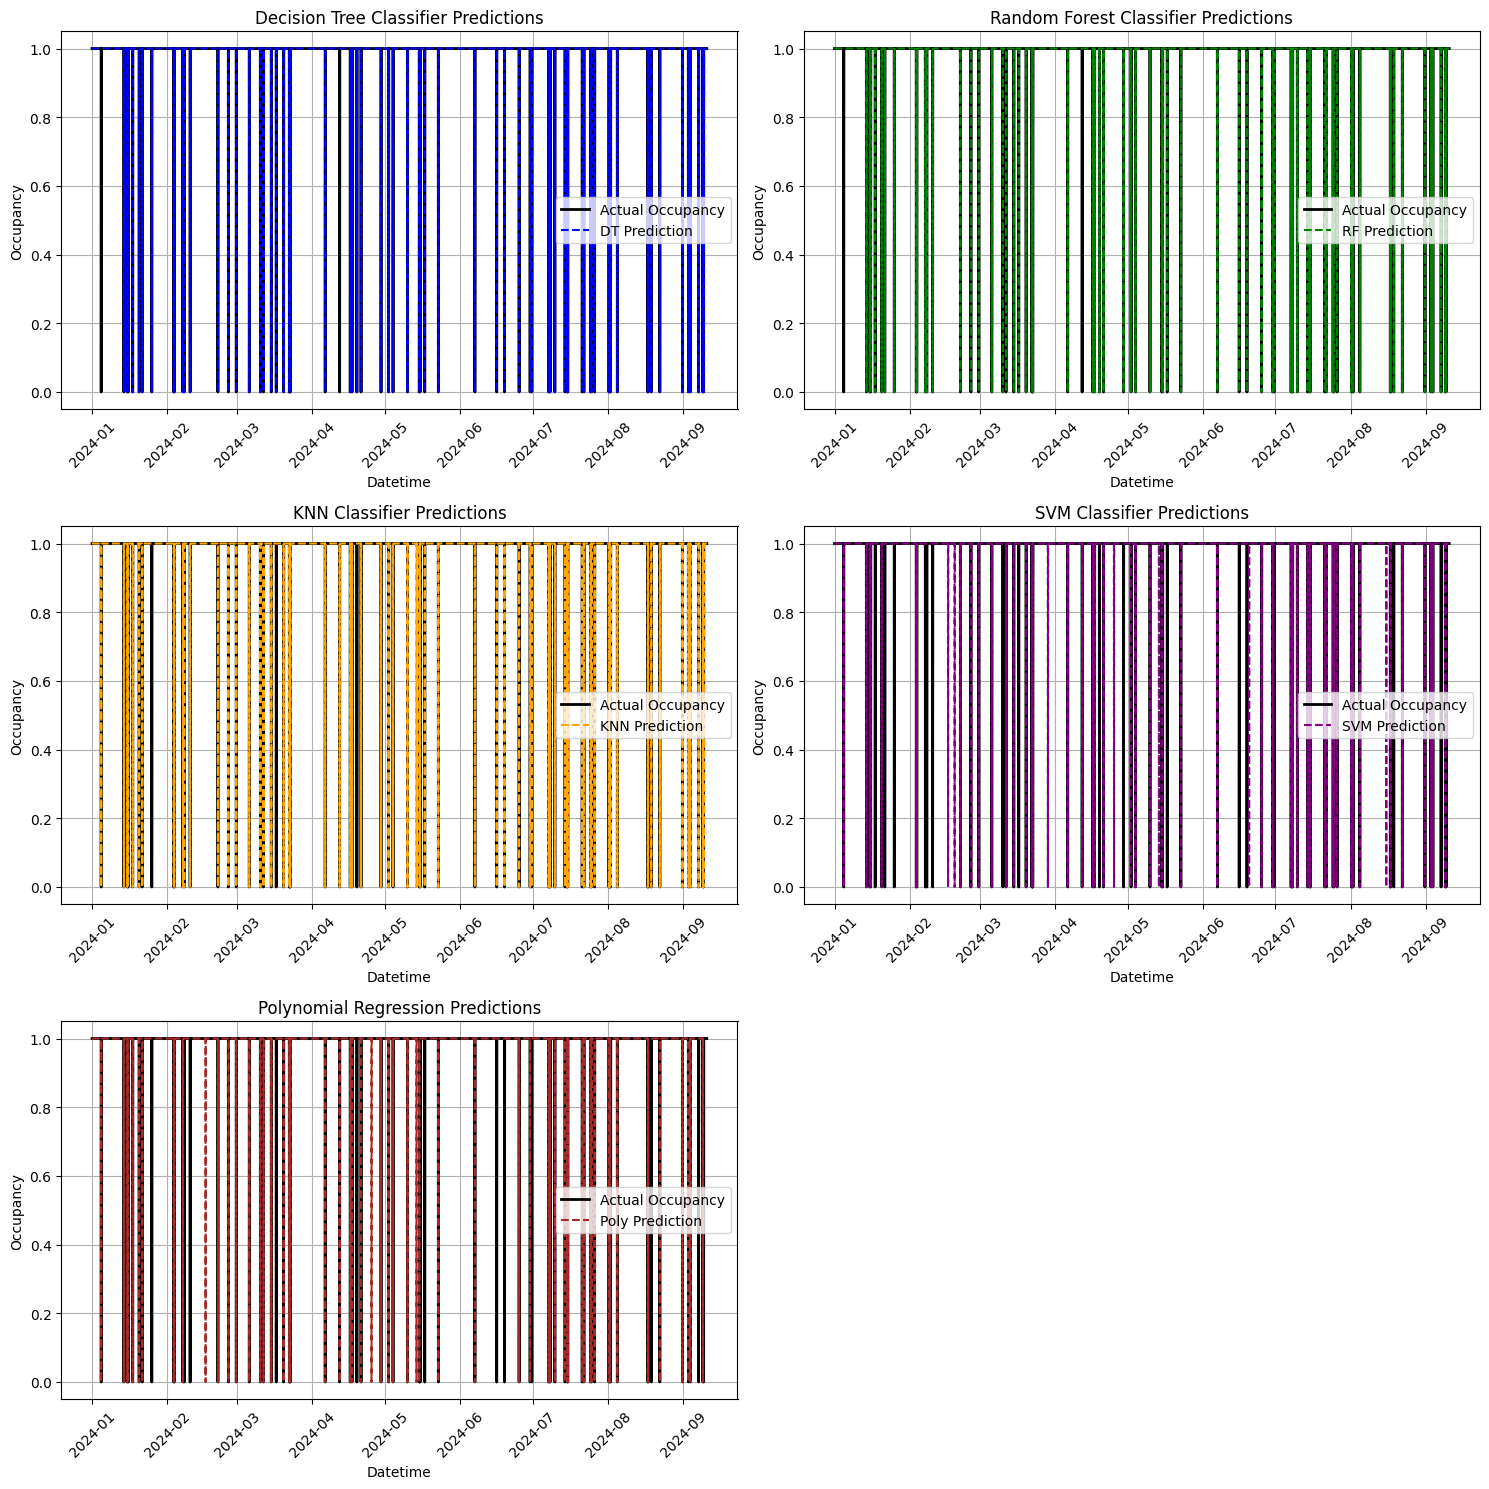

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions using your models (ensure these are based on X_test)
# dt_pred = dt_model.predict(X_test)  # Decision Tree
# rf_pred = rf_model.predict(X_test)  # Random Forest
# knn_pred = knn_model.predict(X_test)  # KNN
# svm_pred = svm_model.predict(X_test)  # SVM
# poly_pred = poly_model.predict(X_test)  # Polynomial Regression

# Create a results DataFrame
results = pd.DataFrame({'Occupancy': y_test})

# Add predictions from each model to the results DataFrame
results['DT_Prediction'] = dt_pred
results['RF_Prediction'] = rf_pred
results['KNN_Prediction'] = knn_pred
results['SVM_Prediction'] = svm_pred
results['Poly_Prediction'] = poly_pred
# If Gaussian predictions are available, uncomment the line below
# results['Gaussian_Prediction'] = gaussian_pred

# Create a datetime index assuming you have a corresponding datetime index for your test set
# Example: if you have an existing datetime index in your original DataFrame
# results.index = df.loc[y_test.index, 'datetime']

# Example datetime index for demonstration purposes
results.index = pd.date_range(start='2024-01-01', periods=len(results), freq='H')  # Adjust start and freq as necessary

# Plotting
plt.figure(figsize=(15, 15))

# Subplot for Decision Tree Predictions
plt.subplot(3, 2, 1)
plt.plot(results.index, results['Occupancy'], label='Actual Occupancy', color='black', linewidth=2)
plt.plot(results.index, results['DT_Prediction'], label='DT Prediction', color='blue', linestyle='--')
plt.title('Decision Tree Classifier Predictions')
plt.xlabel('Datetime')
plt.ylabel('Occupancy')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Subplot for Random Forest Predictions
plt.subplot(3, 2, 2)
plt.plot(results.index, results['Occupancy'], label='Actual Occupancy', color='black', linewidth=2)
plt.plot(results.index, results['RF_Prediction'], label='RF Prediction', color='green', linestyle='--')
plt.title('Random Forest Classifier Predictions')
plt.xlabel('Datetime')
plt.ylabel('Occupancy')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Subplot for KNN Predictions
plt.subplot(3, 2, 3)
plt.plot(results.index, results['Occupancy'], label='Actual Occupancy', color='black', linewidth=2)
plt.plot(results.index, results['KNN_Prediction'], label='KNN Prediction', color='orange', linestyle='--')
plt.title('KNN Classifier Predictions')
plt.xlabel('Datetime')
plt.ylabel('Occupancy')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Subplot for SVM Predictions
plt.subplot(3, 2, 4)
plt.plot(results.index, results['Occupancy'], label='Actual Occupancy', color='black', linewidth=2)
plt.plot(results.index, results['SVM_Prediction'], label='SVM Prediction', color='purple', linestyle='--')
plt.title('SVM Classifier Predictions')
plt.xlabel('Datetime')
plt.ylabel('Occupancy')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Subplot for Polynomial Predictions
plt.subplot(3, 2, 5)
plt.plot(results.index, results['Occupancy'], label='Actual Occupancy', color='black', linewidth=2)
plt.plot(results.index, results['Poly_Prediction'], label='Poly Prediction', color='brown', linestyle='--')
plt.title('Polynomial Regression Predictions')
plt.xlabel('Datetime')
plt.ylabel('Occupancy')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Uncomment for Gaussian Predictions if available
# plt.subplot(3, 2, 6)
# plt.plot(results.index, results['Occupancy'], label='Actual Occupancy', color='black', linewidth=2)
# plt.plot(results.index, results['Gaussian_Prediction'], label='Gaussian Prediction', color='red', linestyle='--')
# plt.title('Gaussian Process Classifier Predictions')
# plt.xlabel('Datetime')
# plt.ylabel('Occupancy')
# plt.xticks(rotation=45)
# plt.grid()
# plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
